Here, we will study different techniques for optimizing over the regression weights $\alpha$ and $\beta$ of a linear regression model $y\sim\mathcal{N}(x_i\alpha+\beta, 1^{2})$, where the training data is generated using $\alpha=5$ and $\beta=1$. Specifically, create a training data-set by generating 1000 data points using $x$ uniformly distributed in $[-1,1]$ and perturb the observed outputs $y_i$ with a zero-mean uncorrelated Gaussian noise 
$\mathcal{N}(0,1)$. We're going to use an initial guess for the parameters from $(\alpha_0,\beta_0)=(0.5,0.5)$ and set the learning rate to $\eta = 0.002$.
 
Let's start with gradient descent to find $\alpha$ and $\beta$. Let's also report the negative log-likelihood and the parameter trajectory over a contour plot in the parameter space.

## Gradient Descent

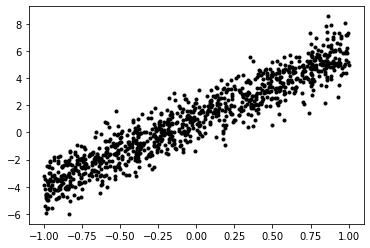

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

#Create the training set data
alpha = 5
beta = 1
n=1000
x = np.random.uniform(-1,1,n) # 1000 x points uniformly distributed between [-1,1]
x.sort()
mean = x*alpha+beta # mean = xa+b
y = np.random.normal(mean,1,n)
#this is the training set data
fig,ax = plt.subplots()
ax.plot(x,y,'k.')
plt.show()

In [5]:
#New initial guess
alpha = 0.5
beta = 0.5
eta = 0.002 #learning rate
theta = np.array([alpha,beta])

# (1) Use GD to find alpha and beta. 
#Report the negative log-likelihood and the parameter trajectory over a contour plot in the parameter space.
phi=np.ones((n,2))
phi[:,0] = x
tol=10**(-6)
a=np.matmul(np.transpose(phi),y)
b=np.matmul(np.transpose(phi),phi)
dLoss=(np.matmul(b,theta)-a)/n
c = np.matmul(phi,theta) # n x 1 array
nlog=(n/2)*np.log(2*np.pi)+(1/2)*np.matmul(np.transpose(y-c),(y-c)) #scalar

iterations = 0
norm=5 # set to a high value to get while loop going
limit=50000 # limit of number of iterations
alphaGD=[alpha] #these are to keep track of the values over the contour space
betaGD=[beta]
lossGD=[nlog]

while norm > tol:
    dLoss = (np.matmul(b,theta)-a)/n
    theta = theta-eta*dLoss
    norm = np.linalg.norm(dLoss,2)
    c = np.matmul(phi,theta) # n x 1 array
    nlog=(n/2)*np.log(2*np.pi)+(1/2)*np.matmul(np.transpose(y-c),(y-c)) #scalar
    alphaGD=np.append(alphaGD, theta[0])
    betaGD=np.append(betaGD,theta[1])
    lossGD=np.append(lossGD,nlog)
    iterations = iterations+1
    if iterations >= limit:
        print('Number of iterations limit reached.')
        break
print(theta)
print(iterations)

[4.91866047 1.01654292]
20733


## Newton's method 
Let's repeat this using Newton’s method instead of gradient descent.

In [6]:
from numpy.linalg import inv

# Initial guess
alpha = 0.5
beta = 0.5
theta = np.array([alpha,beta])

# Repeat using Newton's Method.
a=np.matmul(np.transpose(phi),y)
b=np.matmul(np.transpose(phi),phi)
dum=np.matmul(b,theta)
c=np.matmul(inv(b),(dum-a))
d = np.matmul(phi,theta) # n x 1 array
nlog=(n/2)*np.log(2*np.pi)+(1/2)*np.matmul(np.transpose(y-d),(y-d)) #scalar

iterations = 0
norm=5 # set to a high value to get while loop going
limit=50000 # limit of number of iterations to prevent infinite loop
alphaNM=[alpha] #these are to keep track of the values over the contour space
betaNM=[beta]#
lossNM=[nlog]

while norm > tol:
    dum=np.matmul(b,theta)
    c=np.matmul(inv(b),(dum-a))
    theta = theta-c
    dLoss=(np.matmul(b,theta)-a)/n
    norm = np.linalg.norm(dLoss,2)
    d = np.matmul(phi,theta) # n x 1 array
    nlog=(n/2)*np.log(2*np.pi)+(1/2)*np.matmul(np.transpose(y-d),(y-d)) #scalar
    alphaNM=np.append(alphaNM, theta[0])
    betaNM=np.append(betaNM,theta[1])
    lossNM=np.append(lossNM,nlog)
    iterations = iterations+1
    if iterations >= limit:
        print('Number of iterations limit reached.')
        break
print(theta)
print(iterations)

[4.91866338 1.01654302]
1


## Natural Gradient Descent

Now, let's use the natural gradient descent update rule:

$$\theta_{n+1} = \theta_n - \eta F^{-1}g(\theta)$$

to find the optimal $\alpha$ and $\beta$, where $g(\theta)$ is the gradient of negative log likelihood with respect to the model parameters.

In [12]:
#New initial guess
alpha,beta = 0.5,0.5
eta = 0.002 #learning rate
theta = np.array([alpha,beta])

# (5) Natural Gradient Descent Update Rule 
a=np.matmul(np.transpose(phi),y)
b=np.matmul(np.transpose(phi),phi)
dLoss=np.matmul(b,theta)-a
F = np.zeros((2,2))
gradp=np.zeros((2,1))
c = np.matmul(phi,theta) # n x 1 array
nlog=(n/2)*np.log(2*np.pi)+(1/2)*np.matmul(np.transpose(y-c),(y-c)) #scalar

iterations = 0
norm=5 # set to a high value to get while loop going
limit=50000 # limit of number of iterations
alphaNG=[alpha] #these are to keep track of the values over the contour space
betaNG=[beta]
lossNG=[nlog]

while norm > tol:
    dLoss = np.matmul(b,theta)-a
    F = np.zeros((2,2))
    for i in range(n):
        dum=phi[i,:].reshape((1,-1))
        gradp=-1*(np.matmul(np.matmul(np.transpose(dum),dum),theta)-np.transpose(dum)*y[i])
        F= F + np.matmul(gradp,np.transpose(gradp))
    F = F/n
    theta = theta-eta*np.matmul(inv(F),dLoss)
    norm = np.linalg.norm(dLoss,2)
    c = np.matmul(phi,theta) # n x 1 array
    nlog=(n/2)*np.log(2*np.pi)+(1/2)*np.matmul(np.transpose(y-c),(y-c)) #scalar
    alphaNG=np.append(alphaNG, theta[0])
    betaNG=np.append(betaNG,theta[1])
    lossNG=np.append(lossNG,nlog)
    iterations = iterations+1
    if iterations >= limit:
        print('Number of iterations limit reached.')
        break
print(theta)
print(iterations)

[4.91866338 1.01654302]
260


## We're going to plot all numerical results of the computed parameter trajectories in one figure, as well as all the losses in a separate figure. 

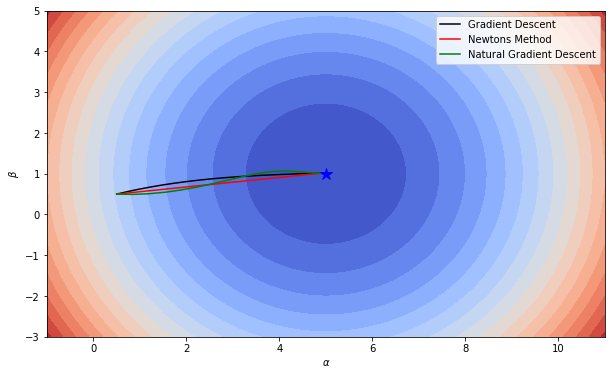

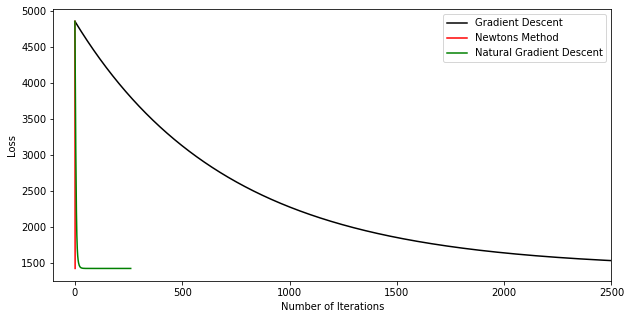

In [13]:
#Make the contour plot
X = np.arange(-1,11,0.01)
Y = np.arange(-3,5,0.01)
xx, yy = np.meshgrid(X, Y,sparse=True)
Z = (xx-5)**2 + (yy-1)**2

fig,ax = plt.subplots(figsize=(10,6))
ax.contourf(X,Y,Z,18,cmap='coolwarm')
ax.plot(alphaGD,betaGD,'k',label='Gradient Descent')
ax.plot(alphaNM,betaNM,'r',label='Newtons Method')
ax.plot(alphaNG,betaNG,'g',label='Natural Gradient Descent')
ax.plot(5,1,'b*',markersize=12)
ax.set_ylabel(r'$\beta$')
ax.set_xlabel(r'$\alpha$')
ax.set_xlim([-1,11])
ax.set_ylim([-3,5])
ax.legend()
plt.show()

# Make the losses plot

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(lossGD,'k',label='Gradient Descent')
ax.plot(lossNM,'r',label='Newtons Method')
ax.plot(lossNG,'g',label='Natural Gradient Descent')
ax.set_ylabel('Loss')
ax.set_xlabel('Number of Iterations')
ax.set_xlim([-100,2500])
ax.legend()
plt.show()